<a href="https://colab.research.google.com/github/yashmanuraj2/udacity-DS/blob/master/DSproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

cd = pd.read_csv('/content/drive/My Drive/boston/calendar.csv')
li = pd.read_csv('/content/drive/My Drive/boston/listings.csv')
rev = pd.read_csv('/content/drive/My Drive/boston/reviews.csv')

li.head()





,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1

exploring the data

No of rows and columns in the dataset

In [0]:
#rows and columns in calendar
rows_calendar=len(cd.axes[0])
col_calendar=len(cd.axes[1])
print("Number of Rows: "+str(rows_calendar))
print("Number of Columns: "+str(col_calendar))

Number of Rows: 1308890
Number of Columns: 4


In [0]:
#@rows and columns in listings
rows_listing = len(li.axes[0])
col_listings=len(li.axes[1])
print("Number of Rows: "+str(rows_listing))
print("Number of Columns: "+str(col_listings))


Number of Rows: 3585
Number of Columns: 95


In [0]:
#rows and columns in reviews
rows_rev = len(rev.axes[0])
col_rev=len(rev.axes[1])
print("Number of Rows: "+str(rows_rev))
print("Number of Columns: "+str(col_rev))

Number of Rows: 68275
Number of Columns: 6


**ANALYSIS WILL BE DONE ON LISTINGS DATA ONLY CALENDAR AND REVIEWS WILL NOT BE CONSIDERED**

# New Section

In [0]:
#columns with no null values
no_nulls1 = set(cd.columns[cd.isnull().mean()==0])
no_nulls2= set(li.columns[li.isnull().mean()==0])
no_nulls3 = set(rev.columns[rev.isnull().mean()==0])
print(no_nulls1)
print(no_nulls2)
print(no_nulls3)

{'listing_id', 'available', 'date'}
{'host_listings_count', 'requires_license', 'cancellation_policy', 'require_guest_phone_verification', 'description', 'state', 'calculated_host_listings_count', 'host_total_listings_count', 'availability_30', 'host_picture_url', 'id', 'latitude', 'listing_url', 'host_since', 'host_thumbnail_url', 'price', 'picture_url', 'extra_people', 'instant_bookable', 'host_id', 'host_identity_verified', 'street', 'name', 'room_type', 'neighbourhood_cleansed', 'scrape_id', 'maximum_nights', 'country_code', 'require_guest_profile_picture', 'host_url', 'host_is_superhost', 'availability_365', 'calendar_last_scraped', 'host_has_profile_pic', 'number_of_reviews', 'accommodates', 'is_location_exact', 'experiences_offered', 'longitude', 'calendar_updated', 'guests_included', 'availability_90', 'host_name', 'last_scraped', 'smart_location', 'bed_type', 'minimum_nights', 'host_verifications', 'availability_60', 'country', 'amenities'}
{'listing_id', 'id', 'date', 'review

removing cols with 75% missing values

columns with 75% of their values missing

In [0]:
most_missing_cols_cal = set(cd.columns[cd.isnull().mean() > 0.75])
most_missing_cols_lis = set(li.columns[li.isnull().mean()>0.75])
most_missing_cols_rev= set(rev.columns[rev.isnull().mean() > 0.75])


print(most_missing_cols_lis)


{'square_feet', 'has_availability', 'monthly_price', 'weekly_price', 'license', 'jurisdiction_names', 'neighbourhood_group_cleansed'}


*italicized text*# New Section

filtering the data

removing price associated with nan values


In [0]:
li.city.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'Jamaica plain ', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', '波士顿',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Watertown', 'Brighton',
       'Brighton ', 'Boston ', nan, 'West Roxbury', 'Newton', 'Hyde Park',
       'Mattapan', 'Milton', 'Dorchester', 'dorchester, boston ',
       'South Boston', 'Allston', 'ALLSTON'], dtype=object)

removing duplicate cities

In [0]:
li['city_cleansed'] = li.city.copy()

In [0]:

li['city_cleansed'] = li.city_cleansed.replace('ALLSTON', 'Allston')
li['city_cleansed'] = li.city_cleansed.replace('Roslindale, Boston', 'Roslindale')
li['city_cleansed'] = li.city_cleansed.replace('dorchester, boston ', 'Dorchester')
li['city_cleansed'] = li.city_cleansed.replace(['Boston ', 'boston'], 'Boston')
li['city_cleansed'] = li.city_cleansed.replace('east Boston ', 'East Boston')
li['city_cleansed'] = li.city_cleansed.replace('Boston (Charlestown)', 'Charlestown')
li['city_cleansed'] = li.city_cleansed.replace('ROXBURY CROSSING', 'Roxbury Crossing')
li['city_cleansed'] = li.city_cleansed.replace('Brighton ', 'Brighton')
li['city_cleansed'] = li.city_cleansed.replace(
    ['Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
     'Jamaica Plain ', 'Jamaica plain ', 'Boston (Jamaica Plain)',], 'Jamaica Plain')

AttributeError: ignored

In [0]:
li.city_cleansed.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'Jamaica plain ', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', '波士顿',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Watertown', 'Brighton',
       'Brighton ', 'Boston ', nan, 'West Roxbury', 'Newton', 'Hyde Park',
       'Mattapan', 'Milton', 'Dorchester', 'dorchester, boston ',
       'South Boston', 'Allston', 'ALLSTON'], dtype=object)

In [0]:
features_df = li.copy()


removing dollart sign from price in li and features

In [0]:
li['price'] = li['price'].replace({'\$': '', ',': ''}, regex=True)
li['price'] =li['price'].astype(float)

TypeError: ignored

In [0]:
 
features_df['price'] = features_df['price'].replace({'\$': '', ',': ''}, regex=True)
features_df['price'] = features_df['price'].astype(float64)

NameError: ignored

In [0]:
accomodates_count = features_df.accommodates.value_counts()
print(accomodates_count)

2     1483
4      650
1      439
3      428
5      245
6      203
8       55
7       39
10      19
9       10
12       5
11       4
14       3
16       2
Name: accommodates, dtype: int64


In [0]:
li.groupby(['accommodates','price']).price.mean()

accommodates  price
1             20.0      20.0
              22.0      22.0
              25.0      25.0
              27.0      27.0
              28.0      28.0
                       ...  
14            299.0    299.0
              395.0    395.0
              536.0    536.0
16            125.0    125.0
              200.0    200.0
Name: price, Length: 880, dtype: float64

In [0]:
accomodates_count.plot.pie(figsize=(16, 16), fontsize = 30, autopct = '%.2f', title = 'distribution based on number of accomodates');


In [0]:
room_type_count = features_df.room_type.value_counts()
print(room_type_count)

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64


In [0]:
prices_data = features_df.groupby(['property_type','room_type']).price.mean()
prices_data

DataError: ignored

In [0]:
plt.figure(figsize=(12,12));
sns.heatmap(features_df.groupby(['property_type','room_type']).price.mean().unstack(),annot=True, fmt=".2f");

DataError: ignored

<Figure size 864x864 with 0 Axes>

simple bed and breakfast shared room being the cheapest
where as 
entire home/apt and (other category) being the costliest

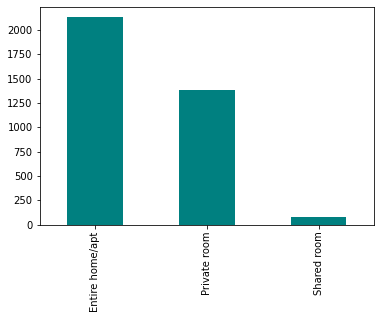

In [0]:
room_type_count.plot(kind='bar', color='teal');

In [0]:
room_type_count.plot.pie(figsize=(8, 8), fontsize = 20, autopct = '%.2f', title = 'Room Type Distribution');


NEXT : Average price per city

In [0]:
prices_city = features_df.groupby(['city_cleansed']).price.mean()
prices_city

DataError: ignored

In [0]:

plt.figure(figsize=(15,8));
prices_data.plot(kind='bar', color='teal');
plt.xlabel('Cities')
plt.ylabel('Average Price')
plt.title('City vs Average Price Chart');

NameError: ignored

<Figure size 1080x576 with 0 Axes>

In [0]:
property_type_count = features_df.property_type.value_counts()
print(property_type_count)

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64


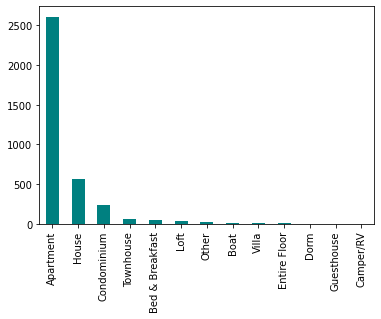

In [0]:
property_type_count.plot(kind='bar', color='teal');

south end boston is the costliest 
where as boston is the cheapest

property type count

COMPARING THE TYPE OF HOUSE AND ROOM WITH PRICES

In [0]:
prices_data = features_df.groupby(['property_type','room_type']).price.mean()
print(prices_data)

property_type    room_type      
Apartment        Entire home/apt    222.479025
                 Private room        98.726463
                 Shared room         84.596774
Bed & Breakfast  Entire home/apt    142.500000
                 Private room       130.921053
                 Shared room         44.000000
Boat             Entire home/apt    265.200000
                 Private room       287.000000
Camper/RV        Entire home/apt     60.000000
Condominium      Entire home/apt    234.640000
                 Private room       109.000000
                 Shared room         70.000000
Dorm             Private room        62.500000
Entire Floor     Entire home/apt    154.000000
                 Private room        90.000000
Guesthouse       Entire home/apt    289.000000
House            Entire home/apt    276.337838
                 Private room        80.246914
                 Shared room         62.333333
Loft             Entire home/apt    217.068966
                 Private ro

In [0]:
price_per_property_type = features_df.groupby('property_type').price.mean()

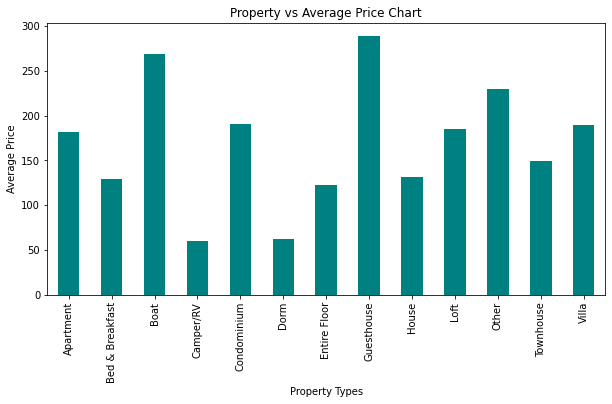

In [0]:
#@title Default title text
plt.figure(figsize=(10,5));
price_per_property_type.plot(kind='bar', color='teal');
plt.xlabel('Property Types')
plt.ylabel('Average Price')
plt.title('Property vs Average Price Chart');

In [0]:
sup_price = features_df.groupby(['host_is_superhost']).price.mean()
pd.options.display.max_rows = 4000
sup_price

host_is_superhost
f    173.604468
t    176.434889
Name: price, dtype: float64

superhosts are costlier than non-superhosts

guesthouses are the costliest whereas rv and camper are the cheapest

In [0]:
superhost_bath = features_df.groupby(['host_is_superhost','bedrooms']).price.mean()
superhost_bed =  features_df.groupby(['host_is_superhost','bedrooms']).price.mean()

In [0]:
print(superhost_bed)


host_is_superhost  bedrooms
f                  0.0         154.557196
                   1.0         137.819358
                   2.0         256.589744
                   3.0         309.647482
                   4.0         371.542857
                   5.0         323.500000
t                  0.0         156.562500
                   1.0         125.325342
                   2.0         278.318841
                   3.0         375.250000
                   4.0         451.900000
                   5.0         745.500000
Name: price, dtype: float64


In [0]:
print(superhost_bath)

In [0]:
superhost_review = features_df.groupby(['host_is_superhost']).review_scores_rating.mean()
superhost_review



host_is_superhost
f    91.061817
t    97.076142
Name: review_scores_rating, dtype: float64

superhosts tend to have a higher rating as compared to normal rooms

In [0]:
superhost_avai =  features_df.groupby(['host_is_superhost']).availability_365.mean()
superhost_avai



host_is_superhost
f    176.670862
t    200.238329
Name: availability_365, dtype: float64

In [0]:
features_df['price'].isnull().sum()

0

superhosts tend to have a higher availabilty than normal rooms

In [0]:
num_cols = li.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,features_df[col].isnull().sum())

id 0
scrape_id 0
host_id 0
host_listings_count 0
host_total_listings_count 0
neighbourhood_group_cleansed 3585
latitude 0
longitude 0
accommodates 0
bathrooms 0
bedrooms 0
beds 0
square_feet 3529
guests_included 0
minimum_nights 0
maximum_nights 0
has_availability 3585
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 0
review_scores_accuracy 823
review_scores_cleanliness 818
review_scores_checkin 820
review_scores_communication 818
review_scores_location 822
review_scores_value 821
license 3585
jurisdiction_names 3585
calculated_host_listings_count 0
reviews_per_month 756


In [0]:
!pip install scikit-learn==0.19.1

In [0]:

features_df['bathrooms'] = features_df['bathrooms'].fillna(0)

# Set 1 for bedrooms where bedrooms is Nan
features_df['bedrooms'] = features_df['bedrooms'].fillna(1)

# Set 1 for beds where beds is Nan
features_df['beds'] = features_df['beds'].fillna(1)
features_df['review_scores_rating']= features_df['review_scores_rating'].fillna(0)
features_df['availability_365']=features_df['availability_365'].fillna(0)
features_df['host_listings_count'] = features_df['host_listings_count'].fillna(1)
features_df['host_total_listings_count'] = features_df['host_total_listings_count'].fillna(1)

In [0]:
def set_bool_tf(tfdata):
    '''
    Function to set all true/false fields to 1 or 0
    INPUT:
    tfdata - the true or false fields that have 't' and 'f' values that we would like to convert to boolean
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if false, 1 for true
    
    Converts a true or false type field into a boolean with 1 and 0s
    '''
    if tfdata == 't':
        return 1
    else: 
        return 0

tf_fields = ['host_is_superhost']
for t in tf_fields:
    features_df[t] =features_df[t].apply(set_bool_tf)

In [0]:
x = features_df[['bedrooms','beds','bathrooms','review_scores_rating','availability_365','host_is_superhost']]
y = features_df[['price']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=42) 
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
# Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print(lm_model.fit(X_train, y_train))
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
The rsquared score on the training data was 0.20131883716156984.  The rsquared score on the test data was 0.14676522476901.


ValueError: ignored

NameError: ignored